In [1]:
import os
import ROOT as R

Welcome to JupyROOT 6.22/00


In [2]:
R.gROOT.SetBatch(True)
R.gStyle.SetOptStat(0)
R.gStyle.SetPadRightMargin(0.05)
R.gStyle.SetPadLeftMargin(0.1)
# R.gStyle.SetPadRightMargin(0.12)
R.gROOT.ForceStyle()

In [3]:
DIR_IN = '/Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots'
FILES_IN = [os.path.join(DIR_IN, name) for name in ['hits_timing_c0.root', 
                                                    'hits_timing_c0_25ns.root', 
                                                    'hits_timing_c0_25ns_nEkin70MeV.root', 
                                                    'hits_timing_c0_25ns_nEkin150MeV.root',
                                                    'hits_timing_c0_25ns_nEkin150MeV_QGSP_BERT.root',
                                                    'hits_timing_mumu2H2bb_QGSP_BERT.root']]
LEGENDS = ['All MARS particles', '+ TOFF < 25 ns', 
           '+ E_{kin}(n) > 70 MeV', 
           '+ E_{kin}(n) > 150 MeV',
           '+ QGSP_BERT']
COLORS = [27, R.kOrange, R.kTeal+2, 1, 2]

In [17]:
def plot_histos(config):
    """Plots histograms according to the configuration"""
    nCanv = len(config['histos'])
    for iC in range(nCanv):
        cHistos = config['histos'][iC]
        cColor = config['colors'][iC]
        cRange = config['range'][iC]
        cRebin = config['rebin'][iC]
        cOut = config['out'][iC]
        print(iC, cOut)
        # Reading histograms
        histos = []
        for iH, hpath in enumerate(cHistos):
            file_path, hname = hpath.split(':')
            file_in = R.TFile(file_path)
            h = file_in.Get(hname).Clone()
            h.Rebin(*cRebin)
            h.SetDirectory(0)
            R.SetOwnership(h, False)
            file_in.Close()
#             R.SetOwnership(h, False)
            histos.append(h)
        leg = None
        if 'legends' in config:
            cLegend = config['legends'][iC]
            leg = R.TLegend(0.6, 0.65, 0.95, 0.9)
            leg.SetFillColor(10)
            leg.SetTextSize(0.03)
        # Drawing histograms
        C = R.TCanvas('C{0:d}'.format(iC), '', 1200, 1200)
        if 'logY' in config and config['logY']:
            C.SetLogy()
        if 'logZ' in config and config['logZ']:
            C.SetLogz()
        C.SetGridx()
        C.SetGridy()
        R.SetOwnership(C, False)
        for iH, h in enumerate(histos):
            if 'title' in config:
                h.SetTitle(config['title'])
            h.SetLineWidth(3)
            h.SetLineColor(cColor[iH])
            h.GetXaxis().SetTitleOffset(1.2)
            if leg:
                leg.AddEntry(h, cLegend[iH], 'l')
            drawOpt = '' if iH == 0 else 'same'
            if h.InheritsFrom('TH2'):
                drawOpt = 'colz'
            if iH == 0:
                h.GetXaxis().SetRangeUser(cRange[0][0], cRange[0][1])
                h.GetYaxis().SetRangeUser(cRange[1][0], cRange[1][1])
                if len(cRange) > 2:
                    h.GetZaxis().SetRangeUser(cRange[2][0], cRange[2][1])
            h.Draw(drawOpt)
        if leg:
            leg.Draw()
            R.SetOwnership(leg, False)
        C.RedrawAxis()
        C.Draw()
        C.SaveAs(cOut)

### Hit timing

0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_time_mt0_zoom.pdf
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_time_mt0_zoom.pdf
2 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/muo_time_mt0_zoom.pdf


Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_time_mt0_zoom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C1
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_time_mt0_zoom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C2
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/muo_time_mt0_zoom.pdf has been created


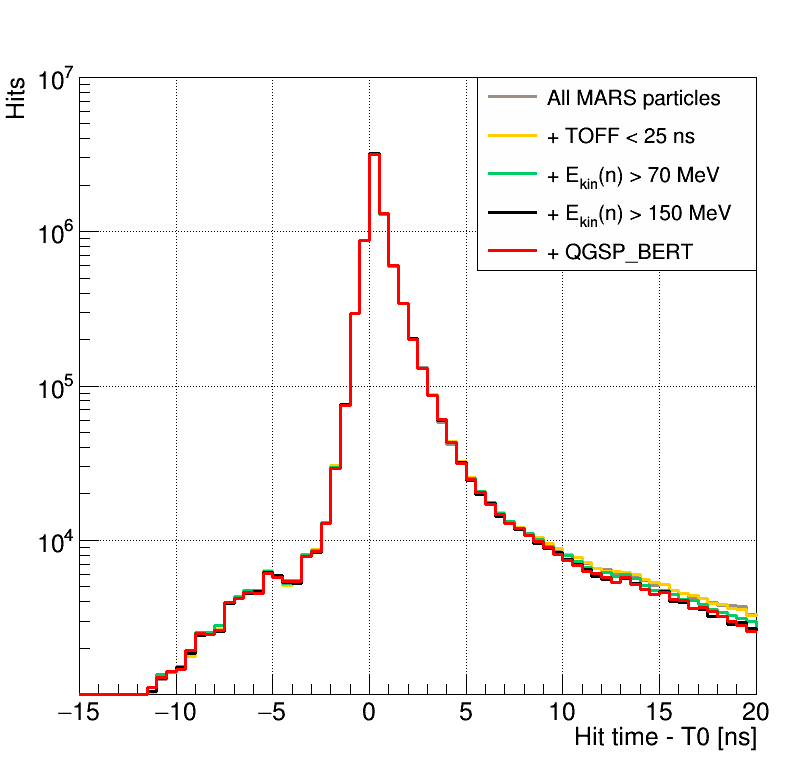

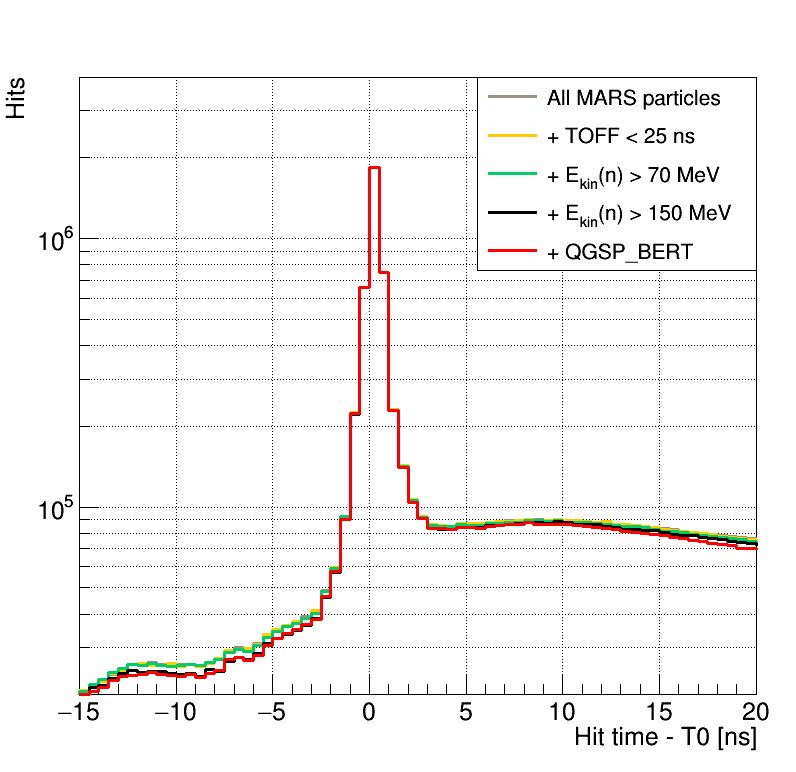

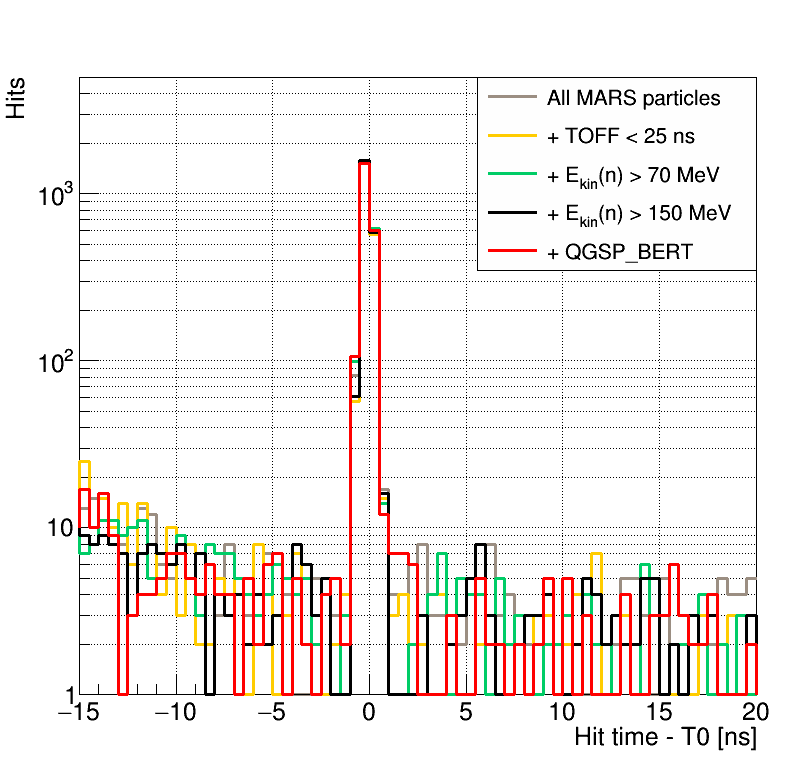

In [236]:
CONFIGS = {
    'histos': [
        [FILES_IN[i] + ':trk_hit_time_mt0' for i in range(5)],
        [FILES_IN[i] + ':cal_hit_time_mt0' for i in range(5)],
        [FILES_IN[i] + ':muo_hit_time_mt0' for i in range(5)],
    ],
    'legends': [LEGENDS]*3,
    'colors': [COLORS]*3,
    'logY': True,
#     Full range
#     'rebin': [[4]]*3,
#     'range': [
#         ((-50, 500), (1e2, 1e7)), 
#         ((-50, 500), (1e4, 5e6)), 
#         ((-50, 100), (1, 5e3)), 
#     ],
#     'out': [
#         os.path.join(DIR_IN, 'timing/trk_time_mt0.pdf'),
#         os.path.join(DIR_IN, 'timing/cal_time_mt0.pdf'),
#         os.path.join(DIR_IN, 'timing/muo_time_mt0.pdf'),
#     ]
#     Zoom in
    'rebin': [[1]]*3,
    'range': [
        ((-15, 20), (1e3, 1e7)), 
        ((-15, 20), (2e4, 4e6)), 
        ((-15, 20), (1, 5e3)), 
    ],
    'out': [
        os.path.join(DIR_IN, 'timing/trk_time_mt0_zoom.pdf'),
        os.path.join(DIR_IN, 'timing/cal_time_mt0_zoom.pdf'),
        os.path.join(DIR_IN, 'timing/muo_time_mt0_zoom.pdf'),
    ]

}
plot_histos(CONFIGS)

### Hit energy

0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_e_tlt10_zoom.pdf
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_e_tlt10_zoom.pdf
0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_e_tlt5_zoom.pdf
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_e_tlt5_zoom.pdf
0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_e_tlt2_zoom.pdf
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_e_tlt2_zoom.pdf


Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_e_tlt10_zoom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C1
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_e_tlt10_zoom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_e_tlt5_zoom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C1
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_e_tlt5_zoom.pdf has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_e_tlt2_zoom.pdf 

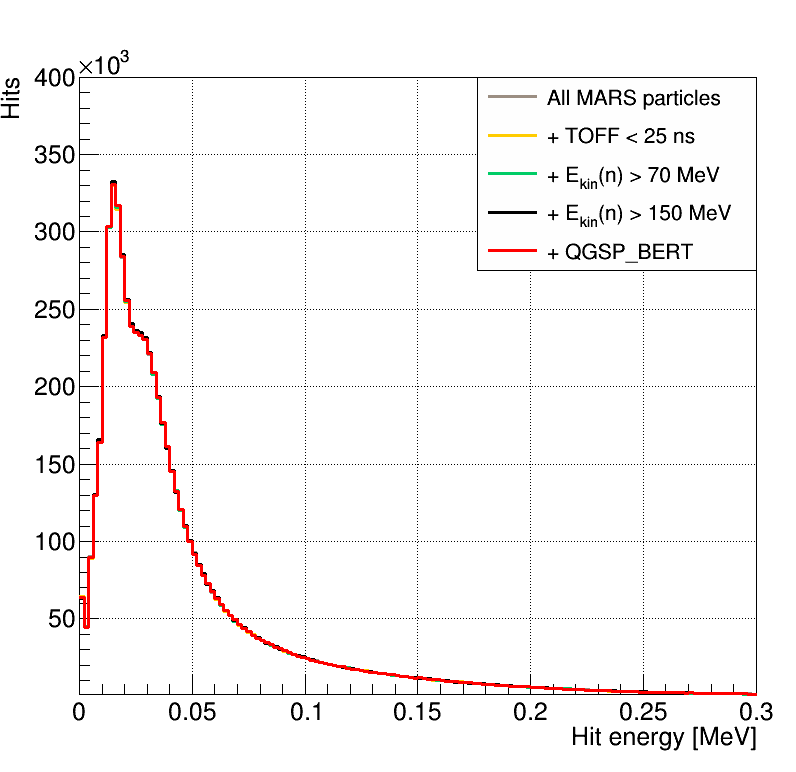

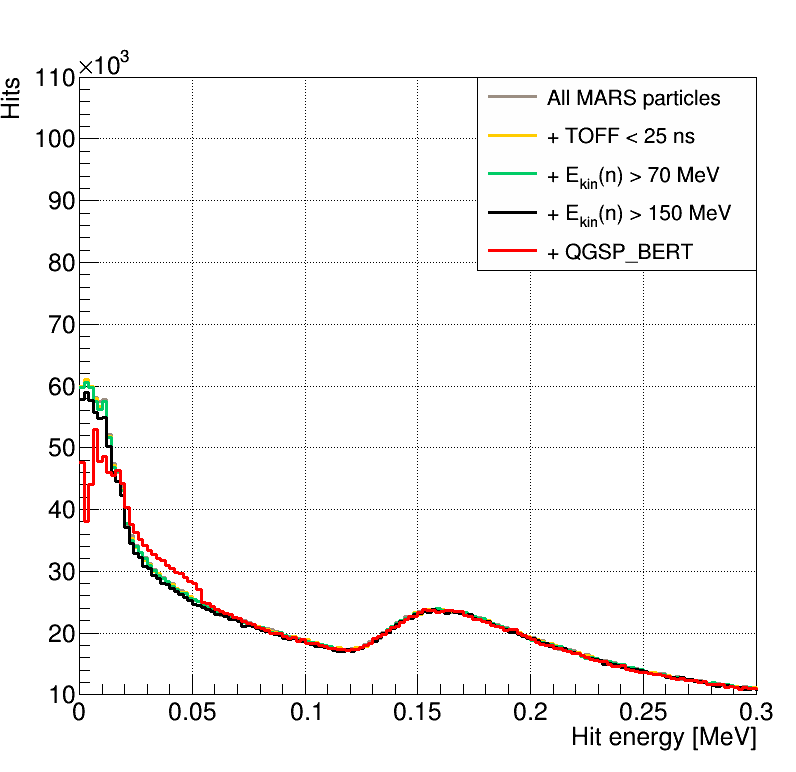

In [251]:
# for tcut in [100]:
for tcut in [10, 5, 2]:
    CONFIGS = {
        'histos': [
            [FILES_IN[i] + ':trk_hit_e_tlt{0:d}'.format(tcut) for i in range(5)],
            [FILES_IN[i] + ':cal_hit_e_tlt{0:d}'.format(tcut) for i in range(5)],
#             [FILES_IN[i] + ':muo_hit_e_tlt{0:d}'.format(tcut) for i in range(5)],
        ],
        'legends': [LEGENDS]*3,
        'colors': [COLORS]*3,
#         # Full range
#         'logY': True,
#         'rebin': [[8], [8], [1]],
#         'range': [
#             ((0, 1), (1e2, 1e7)), 
#             ((0, 1), (1e4, 1e7)), 
#             ((0, 0.2), (1, 1e4)), 
#         ],
#         'out': [
#             os.path.join(DIR_IN, 'timing/trk_e_tlt{0:d}.pdf'.format(tcut)),
#             os.path.join(DIR_IN, 'timing/cal_e_tlt{0:d}.pdf'.format(tcut)),
#             os.path.join(DIR_IN, 'timing/muo_e_tlt{0:d}.pdf'.format(tcut)),
#         ]
        # Zoom in
        'logY': False,
        'rebin': [[1], [1], [1]],
        'range': [
            ((0, 0.3), (1e3, 4e5)), 
            ((0, 0.3), (1e4, 1.1e5)), 
        ],
        'out': [
            os.path.join(DIR_IN, 'timing/trk_e_tlt{0:d}_zoom.pdf'.format(tcut)),
            os.path.join(DIR_IN, 'timing/cal_e_tlt{0:d}_zoom.pdf'.format(tcut)),
        ]
    }
    plot_histos(CONFIGS)

### Hit positions

0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_zy_tlt100_c0.png
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_zy_tlt100_c0.png
0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_zy_tlt100_c0_25ns_nEkin150MeV.png
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_zy_tlt100_c0_25ns_nEkin150MeV.png
0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_zy_tlt100_c0_25ns_nEkin150MeV_QGSP_BERT.png
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_zy_tlt100_c0_25ns_nEkin150MeV_QGSP_BERT.png
0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_zy_tlt10_c0.png
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_zy_tlt10_c0.png
0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_zy_tlt10_c0_25ns_nEkin150MeV.png
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_zy_tlt10_c0_25ns_nEkin150MeV.png
0 /Users/nbartosi/pdc/home/bartosik/clic/t

Info in <TH2I::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_zy_tlt100_c0.png has been created
Info in <TH2I::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C1
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_zy_tlt100_c0.png has been created
Info in <TH2I::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_zy_tlt100_c0_25ns_nEkin150MeV.png has been created
Info in <TH2I::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Warning in <TCanvas::Constr

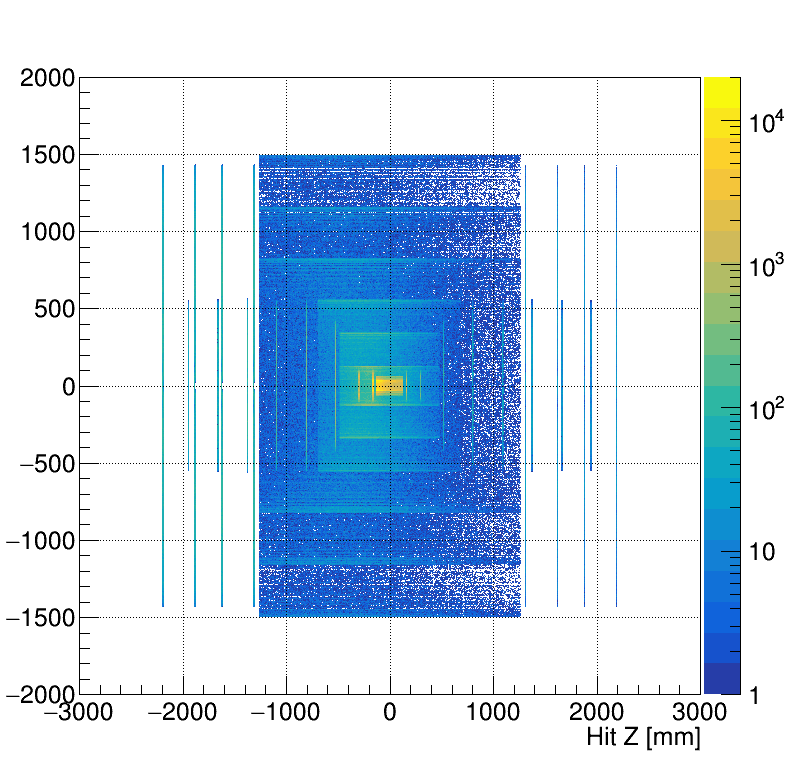

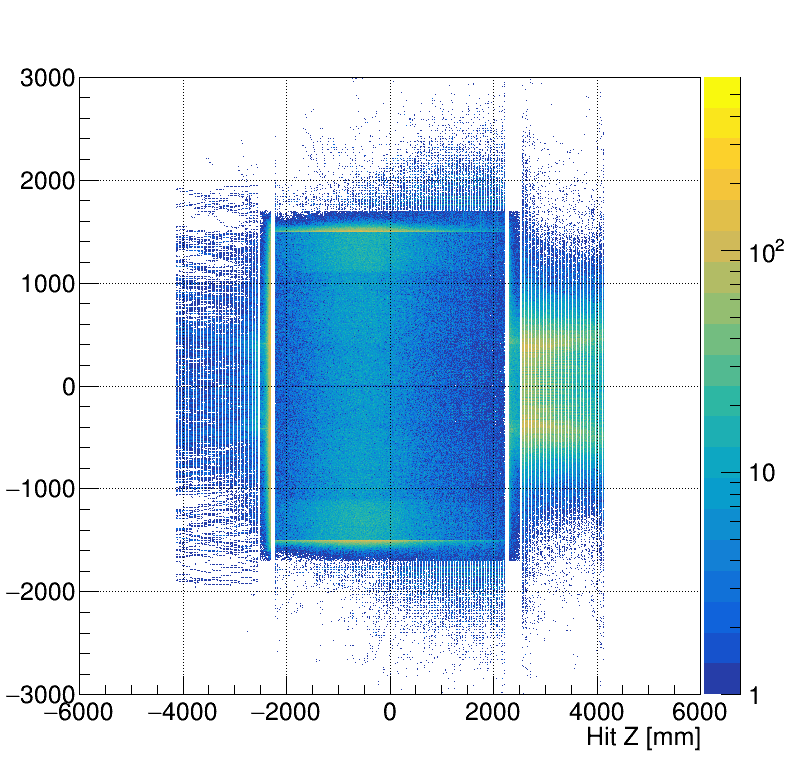

In [22]:
R.gStyle.SetPadRightMargin(0.12)
for tcut in [100, 10, 2]:
    for iF, name in {0: 'c0', 3: 'c0_25ns_nEkin150MeV', 4: 'c0_25ns_nEkin150MeV_QGSP_BERT'}.items():
        CONFIGS = {
            'histos': [[FILES_IN[iF] + ':trk_hit_zy_tlt{0:d}'.format(tcut)],
                       [FILES_IN[iF] + ':cal_hit_zy_tlt{0:d}'.format(tcut)]],
            'rebin': [[1]]*2,
            'colors': [COLORS]*2,
            'range': [((-3000, 3000), (-2000, 2000), (1, 2e4)),
                      ((-6000, 6000), (-3000, 3000), (1, 6e2))],
            'logZ': True,
            'out': [
                os.path.join(DIR_IN, 'timing/trk_zy_tlt{0:d}_{1:s}.png'.format(tcut, name)),
                os.path.join(DIR_IN, 'timing/cal_zy_tlt{0:d}_{1:s}.png'.format(tcut, name)),
            ]
        }
        plot_histos(CONFIGS)

### Hit timing baseline

0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/hit_time_mt0_mumu2H2bb_QGSP_BERT.pdf


Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: pdf file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/hit_time_mt0_mumu2H2bb_QGSP_BERT.pdf has been created


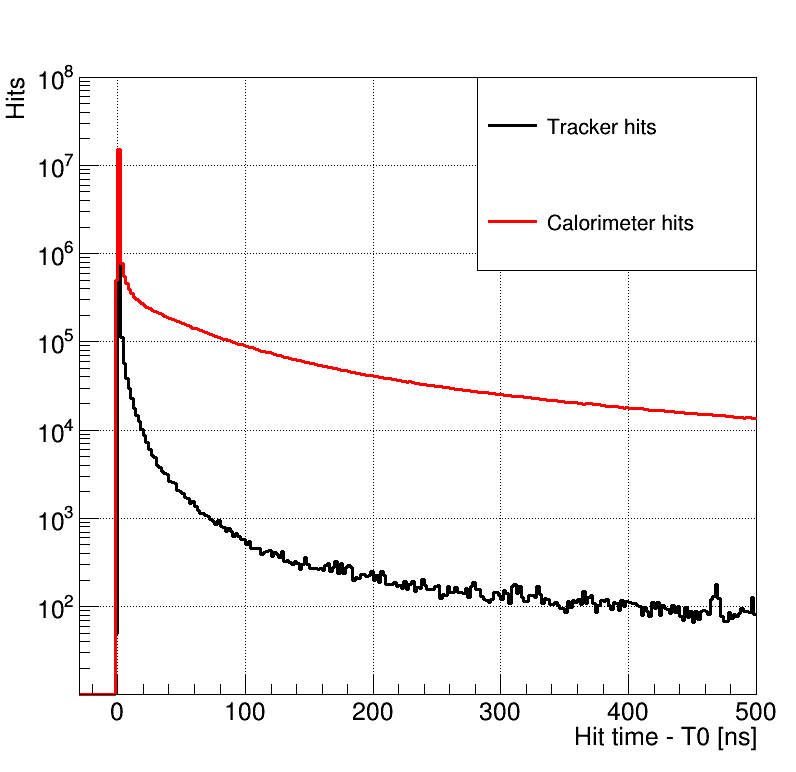

In [41]:
R.gStyle.SetPadRightMargin(0.05)
CONFIGS = {
    'histos': [
        [FILES_IN[5] + ':' + name for name in ['trk_hit_time_mt0', 'cal_hit_time_mt0']]
    ],
    'colors': [[1, 2, R.kTeal+2]],
    'logY': True,
    'legends': [['Tracker hits', 'Calorimeter hits', 'Muon hits']],
    # Full range
    'rebin': [[4]],
    'range': [
        ((-30, 500), (1e1, 1e8)), 
    ],
    'out': [
        os.path.join(DIR_IN, 'timing/hit_time_mt0_mumu2H2bb_QGSP_BERT.pdf'),
    ]

}
plot_histos(CONFIGS)

### Hit time vs Neutron energy

0 /Users/nbartosi/cernbox/work/mu_collider/data/2021_06_12_vchep/plots/hit_cal_n_time_e.png


Info in <TH2I::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: png file /Users/nbartosi/cernbox/work/mu_collider/data/2021_06_12_vchep/plots/hit_cal_n_time_e.png has been created


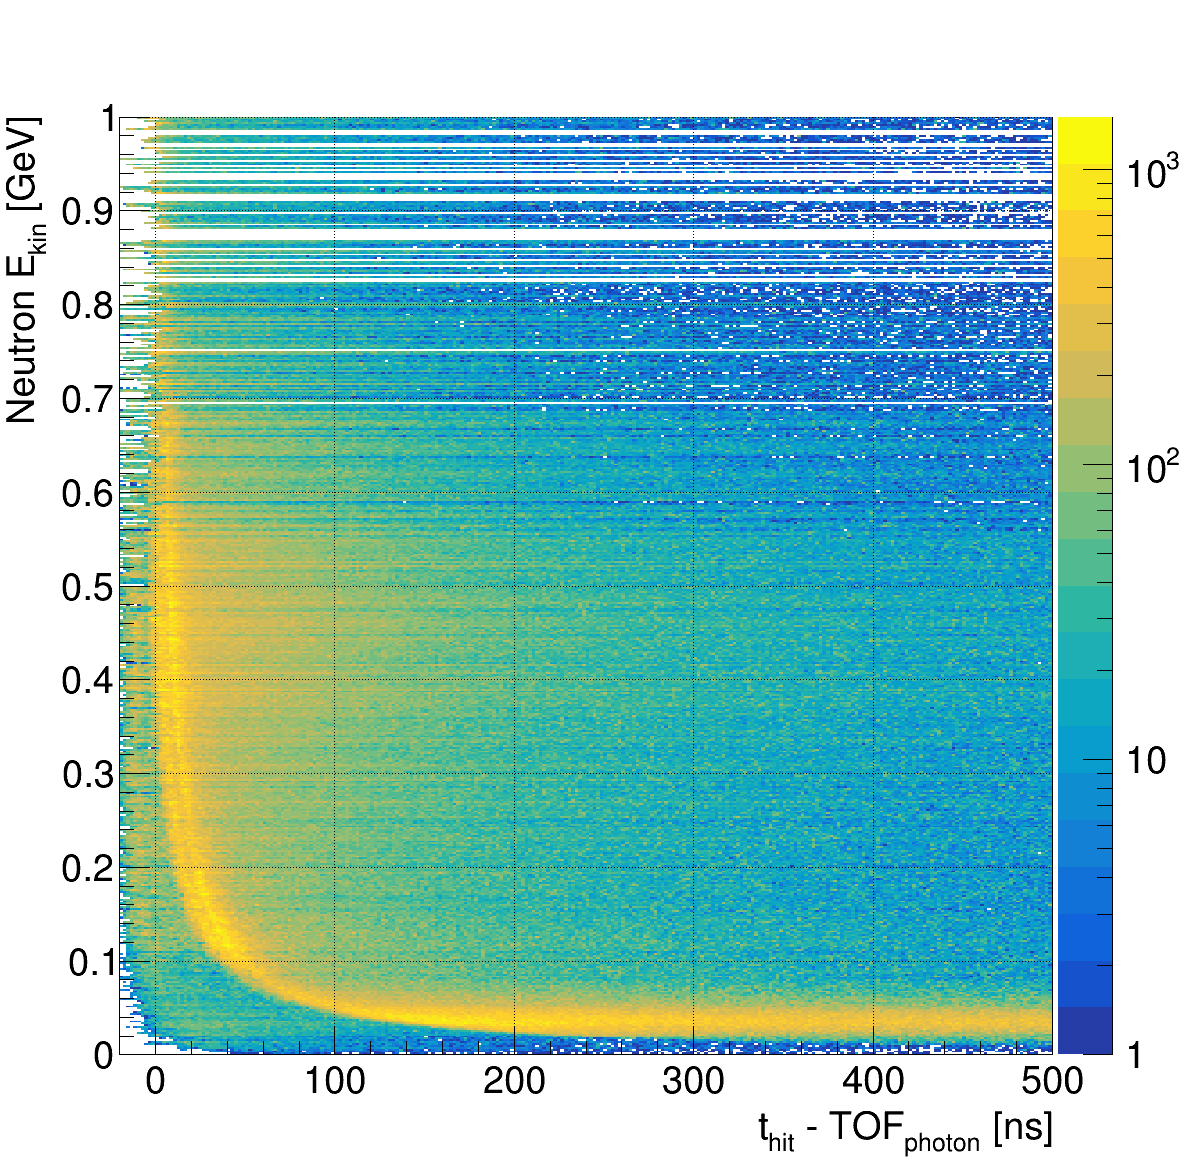

In [18]:
R.gStyle.SetPadRightMargin(0.12)
file_path = '/Users/nbartosi/cernbox/work/mu_collider/data/2021_06_12_vchep/plots_bib/hits_mcp_range_hq.root'
DIR_OUT = '/Users/nbartosi/cernbox/work/mu_collider/data/2021_06_12_vchep/plots/'
CONFIGS = {
    'histos': [['{0:s}:{1:s}'.format(file_path, name)] for name in [
        'h_hit_cal_n_time_e', 
#         'h_hit_trk_n_time_e'
    ]],
    'colors': [COLORS]*2,
    'rebin': [[1]]*2,
    'range': [((-20, 500), (0, 1)),
              ((-20, 500), (0, 1))],
    'logZ': True,
    'title': ';t_{hit} - TOF_{photon} [ns];Neutron E_{kin} [GeV]',
    'out': [
        os.path.join(DIR_OUT, 'hit_cal_n_time_e.png'),
#         os.path.join(DIR_OUT, 'hit_trk_n_time_e.png'),
    ]
}
plot_histos(CONFIGS)

### Hit time vs energy

0 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_hit_time_mt0_e_sig.png
1 /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_hit_time_mt0_e_sig.png


Info in <TH2I::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C0
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/trk_hit_time_mt0_e_sig.png has been created
Info in <TH2I::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Warning in <TCanvas::Constructor>: Deleting canvas with same name: C1
Info in <TCanvas::Print>: png file /Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/timing/cal_hit_time_mt0_e_sig.png has been created


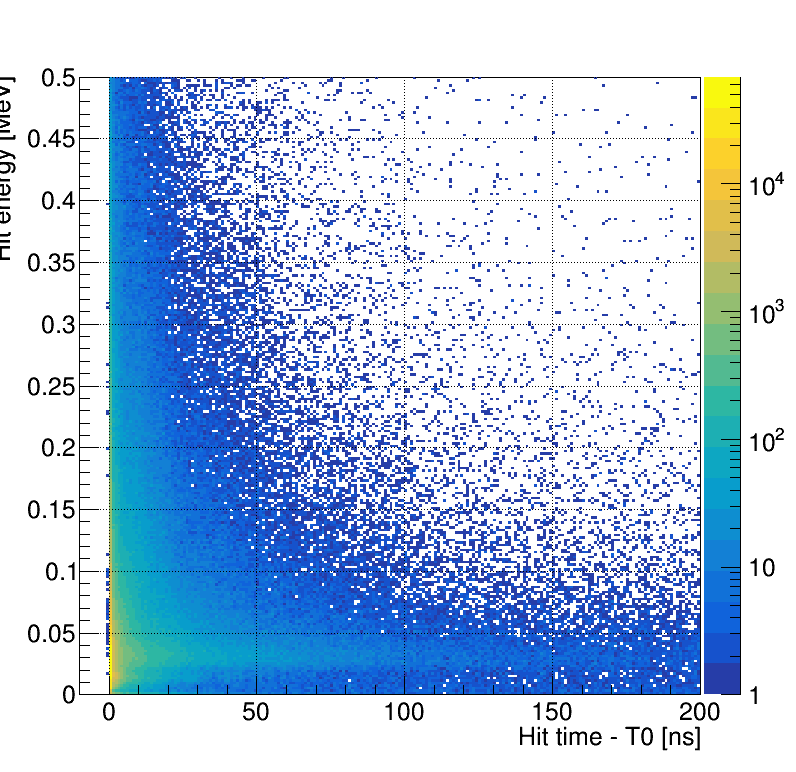

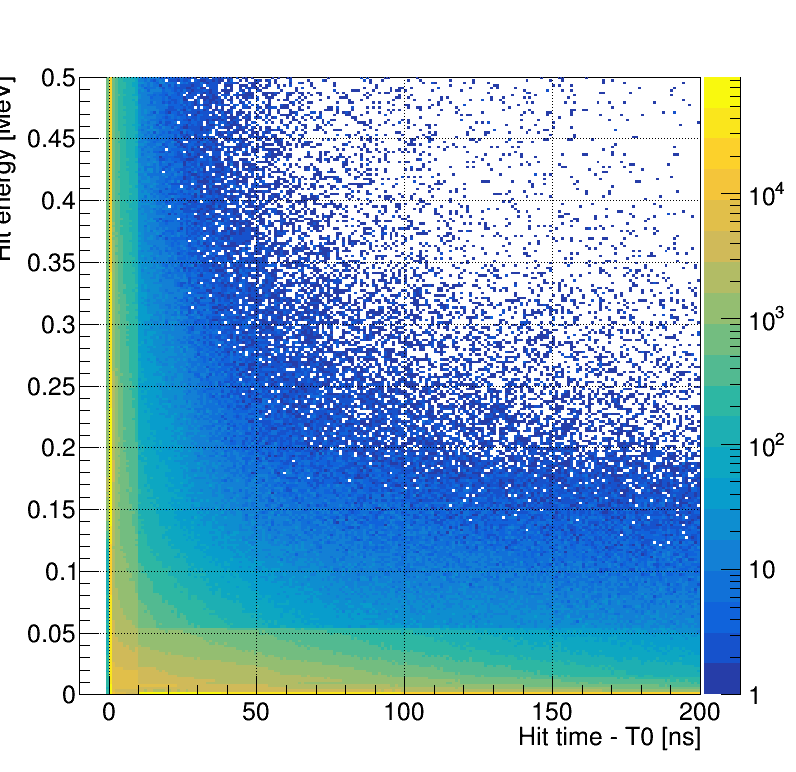

In [56]:
R.gStyle.SetPadRightMargin(0.12)
file_path = '/Users/nbartosi/pdc/home/bartosik/clic/test3_py/plots/hits_timing_mumu2H2bb_QGSP_BERT_2d.root'
CONFIGS = {
    'histos': [['{0:s}:{1:s}'.format(file_path, name)] for name in ['trk_hit_time_mt0_e', 'cal_hit_time_mt0_e']],
    'colors': [COLORS]*2,
    'rebin': [[2]]*2,
    'range': [((-10, 200), (0, 0.5)),
              ((-10, 200), (0, 0.5))],
    'logZ': True,
    'out': [
        os.path.join(DIR_IN, 'timing/trk_hit_time_mt0_e_sig.png'),
        os.path.join(DIR_IN, 'timing/cal_hit_time_mt0_e_sig.png'),
    ]
}
plot_histos(CONFIGS)

In [28]:
import math

In [37]:
l = [11075,11383,10895,10738,10799,10961,11251,9457]
sum(l)/len(l)/3600

3.005520833333333